# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# path = '/content/drive/MyDrive/Tweet Sentiment/Copy of Coronavirus Tweets.csv'
# df = pd.read_csv(path, encoding = 'latin')

In [4]:
df = pd.read_csv('Copy of Coronavirus Tweets.csv', encoding = 'latin')

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
# checking the shape of dataset
df.shape

(41157, 6)

Here the sentiment is the target column.
Let's check the types of sentiments.

Text(0.5, 1.0, 'Sentiment Types')

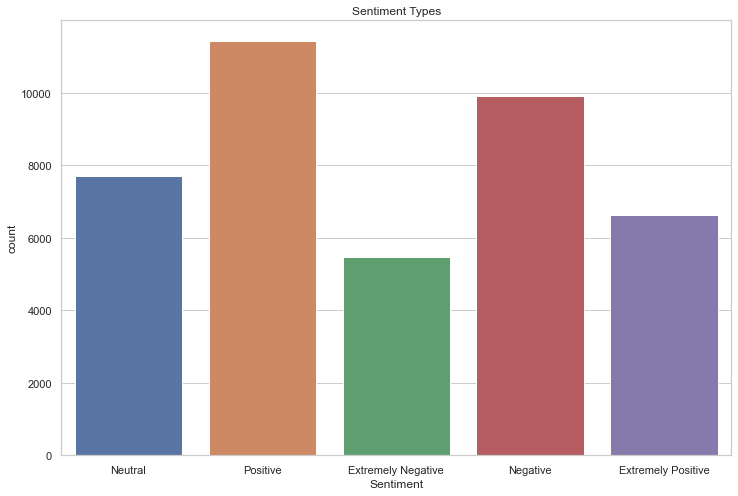

In [21]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = 12, 8
sns.countplot(df['Sentiment']);
# plt.grid(b = None)
plt.title('Sentiment Types')

*From above graph, we can see that, Positive tweets were tweeted the highets followed by Negative and Neutral respectively.

In [15]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# plotting the Locations of the Tweets

In [16]:
locations = df['Location'].value_counts().head(10)

In [17]:
locations_df = pd.DataFrame(locations)

In [18]:
locations_df

,Location
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
United Kingdom,337
"Los Angeles, CA",281
India,268
UK,232
Australia,225


In [19]:
locations_df.reset_index(inplace = True)
# renaming columns
locations_df.rename(columns = {'index': 'Location', 'Location': 'Count'}, inplace = True)
locations_df

,Location,Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


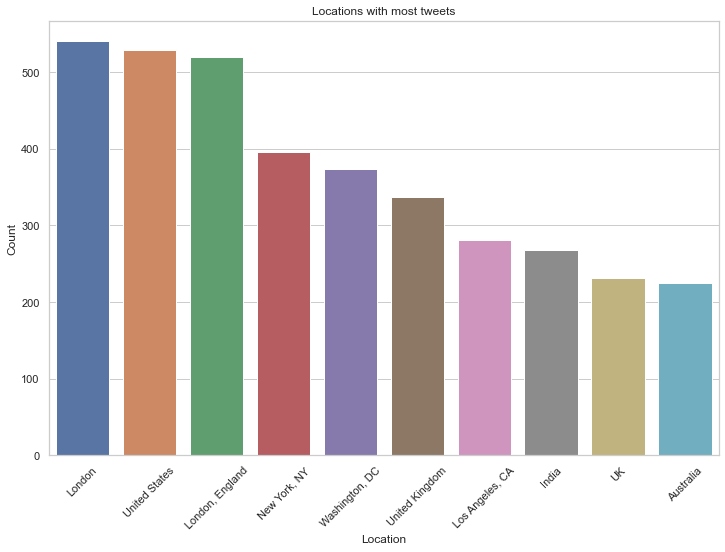

In [22]:
sns.barplot(x = 'Location', y = 'Count', data = locations_df);
plt.xticks(rotation = 45);
plt.title('Locations with most tweets');

* London, USA and England were cities most tweets came from.
* Here, one can see that city names are given separately and country names are given separately.
* There are few cities like London, NY, Washington which tweeted more than their respective country's.

In [23]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Now checking the dtypes of all columns.

In [24]:
df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

* Converting 'TweetAt' column to datetime format.

In [25]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

In [26]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


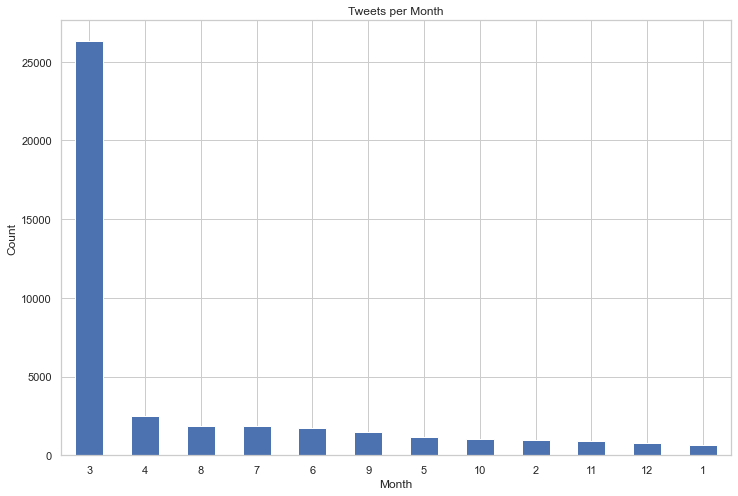

In [27]:
df['TweetAt'].dt.month.value_counts().plot.bar();
plt.xticks(rotation = 0);
# plt.grid(True)
plt.xlabel('Month');
plt.ylabel('Count');
plt.title('Tweets per Month');

* We can see that more than 25k tweets were tweeted in the month of March alone followed by April and August.

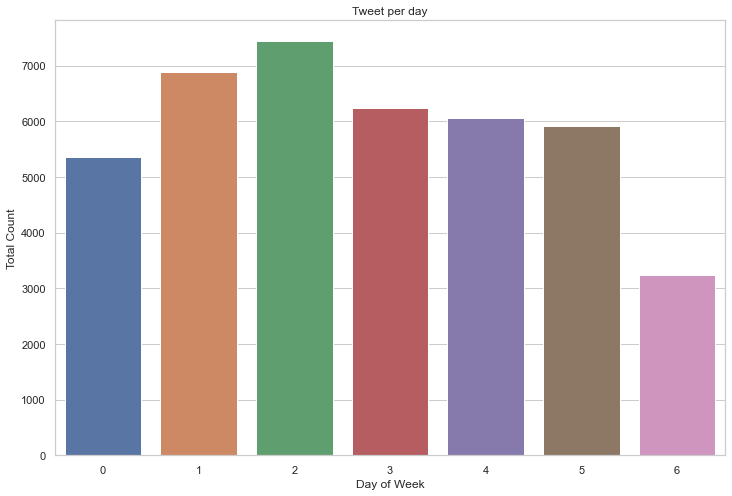

In [28]:
sns.countplot(df['TweetAt'].dt.dayofweek);
plt.xlabel('Day of Week');
plt.ylabel('Total Count');
plt.title('Tweet per day');

* People tweeted more during weekdays compared to weekends.

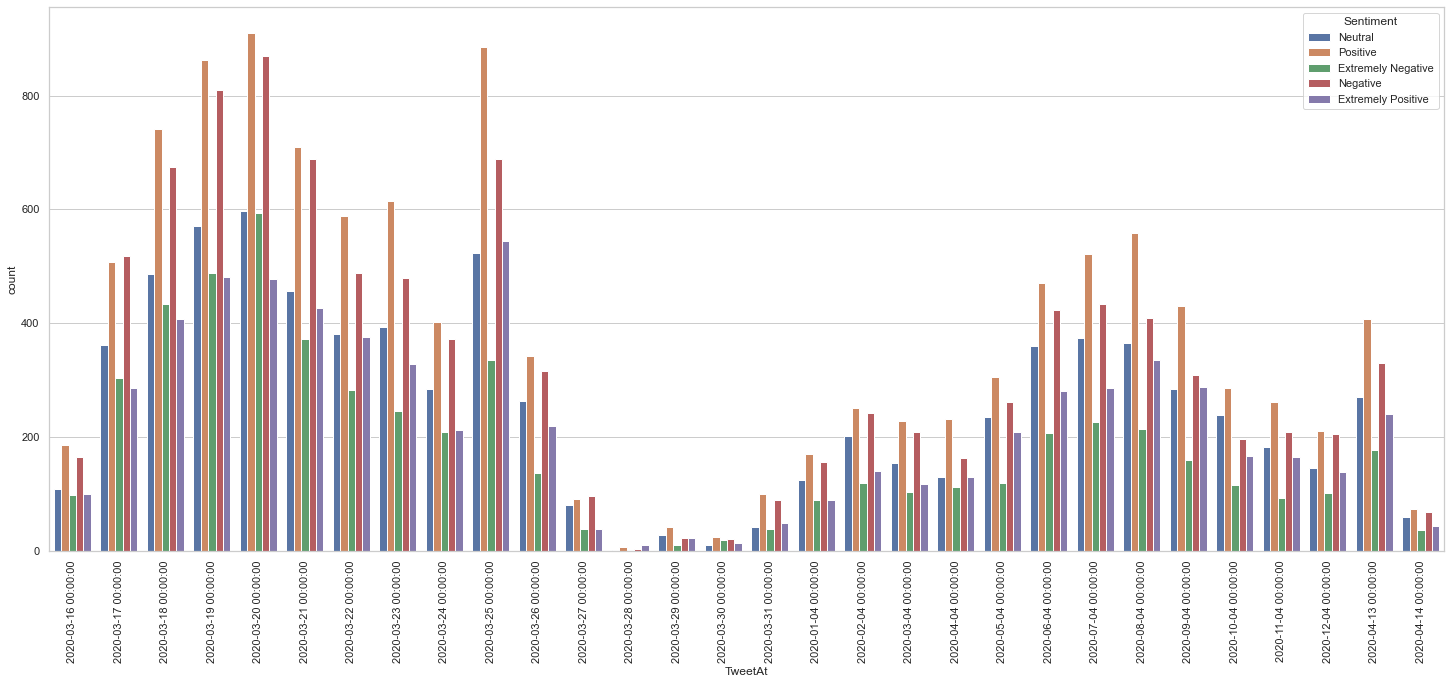

In [29]:
plt.rcParams['figure.figsize'] = 25, 10
sns.countplot(df['TweetAt'].astype('object'), hue = df['Sentiment']);

plt.xticks(rotation = 90);

In [30]:
# checking for missing values
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [31]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


* Now let's look at Original Tweet column.

In [32]:
df[df['Sentiment'] == 'Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,2020-03-16,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,2020-03-16,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",2020-03-16,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,2020-03-16,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,2020-04-14,Food Banks are not equipped for a 30% unemploy...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",2020-04-14,The COVID-19 pandemic and global oil price war...,Extremely Negative
41130,44929,89881,NaN,2020-04-14,Squeo works in the meat department of a Kroger...,Extremely Negative
41133,44932,89884,Austria,2020-04-14,A Singaporean politician who slammed a woman s...,Extremely Negative


* Now let's look at one of the Extremely Negative tweets.

In [33]:
df[df['Sentiment'] == 'Extremely Negative'].loc[20, 'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

In [34]:
df[df['Sentiment'] == 'Extremely Negative'].loc[41153, 'OriginalTweet']

'Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?'

In [35]:
# let's look at negative tweets
df[df['Sentiment'] == 'Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",2020-03-16,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,2020-03-16,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",2020-03-16,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",2020-03-16,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,2020-03-16,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,2020-04-14,Today at the grocery store I saw someone getti...,Negative
41131,44930,89882,"Accra, Ghana",2020-04-14,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",2020-04-14,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",2020-04-14,Still shocked by the number of #Toronto superm...,Negative


In [36]:
df[df['Sentiment'] == 'Negative'].loc[24, 'OriginalTweet']

'@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer'

In [37]:
df[df['Sentiment'] == 'Negative'].loc[41156, 'OriginalTweet']

"@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe"

In [38]:
# getting neutral tweets
df[df['Sentiment'] == 'Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,2020-03-16,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",2020-03-16,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,2020-03-16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",2020-03-16,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,2020-04-14,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,2020-04-14,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,2020-04-14,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral


In [39]:
df[df['Sentiment'] == 'Neutral'].loc[41155, 'OriginalTweet']

'Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus'

In [40]:
df[df['Sentiment'] == 'Neutral'].loc[16, 'OriginalTweet']

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [41]:
# positive tweets
df[df['Sentiment'] == 'Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,2020-04-14,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",2020-04-14,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",2020-04-14,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,2020-04-14,I never that weÂd be in a situation &amp; wor...,Positive


In [42]:
df[df['Sentiment'] == 'Positive'].loc[41145, 'OriginalTweet']

"How exactly are we going to re-open New York City if we still can't buy any hand sanitizer?  #coronavirus"

In [43]:
df[df['Sentiment'] == 'Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",2020-03-16,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,2020-03-16,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,2020-03-16,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,2020-03-16,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,2020-03-16,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",2020-04-14,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",2020-04-14,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,2020-04-14,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,2020-04-14,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [44]:
df[df['Sentiment'] == 'Extremely Positive'].loc[18, 'OriginalTweet']

'Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂ\x93As COVID-19 has spread, weÂ\x92ve seen a significant increase in people shopping online for groceries,Â\x94 a spokeswoman said in a statement. Â\x93Today this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3'

# Data Preoprocessing

The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.


As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.


In [45]:
df1 = df.copy()

In [46]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [47]:
# importing regular expression library
import re

In [48]:
# removing @ symbol followed by the letter
df1['Tweet'] = df['OriginalTweet'].str.replace('@[\w]', '', regex = True)

In [49]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,eNyrbie hil_Gahan hrisitv https://t.co/iFz9FAn...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


We removed all the @ symbols using regex library which is used to identify certain patterns in the text.

Now let's remove http and URLs from the tweets.

In [50]:
df1['Tweet'] = df1['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [51]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,eNyrbie hil_Gahan hrisitv
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


Removing all the special characteres and numers and punctuations.

In [52]:
df1['Tweet'] = df1['Tweet'].str.replace('[^a-zA-Z]+',' ')

In [53]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,eNyrbie hil Gahan hrisitv
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


# Tokenization

In [54]:
tokenized_tweet = df1['Tweet'].apply(lambda x: x.split())

In [55]:
tokenized_tweet

0                           [eNyrbie, hil, Gahan, hrisitv]
1        [advice, Talk, to, your, neighbours, family, t...
2        [Coronavirus, Australia, Woolworths, to, give,...
3        [My, food, stock, is, not, the, only, one, whi...
4        [Me, ready, to, go, at, supermarket, during, t...
                               ...                        
41152    [Airline, pilots, offering, to, stock, superma...
41153    [Response, to, complaint, not, provided, citin...
41154    [You, know, it, s, getting, tough, when, amero...
41155    [Is, it, wrong, that, the, smell, of, hand, sa...
41156    [artiiCat, Well, new, used, Rift, S, are, goin...
Name: Tweet, Length: 41157, dtype: object

# Stemming

We will perform Stemming on the tokenized_tweet.

We will use Snowball stemmer from nltk library as is hadles the words better than PorterStemmer.

In [56]:
# importing snowball stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language='english')

# performing stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [57]:
tokenized_tweet

0                            [enyrbi, hil, gahan, hrisitv]
1        [advic, talk, to, your, neighbour, famili, to,...
2        [coronavirus, australia, woolworth, to, give, ...
3        [my, food, stock, is, not, the, onli, one, whi...
4        [me, readi, to, go, at, supermarket, dure, the...
                               ...                        
41152    [airlin, pilot, offer, to, stock, supermarket,...
41153    [respons, to, complaint, not, provid, cite, co...
41154    [you, know, it, s, get, tough, when, ameronwil...
41155    [is, it, wrong, that, the, smell, of, hand, sa...
41156    [artiicat, well, new, use, rift, s, are, go, f...
Name: Tweet, Length: 41157, dtype: object

In [58]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [59]:
tokenized_tweet

0                                 enyrbi hil gahan hrisitv
1        advic talk to your neighbour famili to exchang...
2        coronavirus australia woolworth to give elder ...
3        my food stock is not the onli one which is emp...
4        me readi to go at supermarket dure the covid o...
                               ...                        
41152    airlin pilot offer to stock supermarket shelv ...
41153    respons to complaint not provid cite covid rel...
41154    you know it s get tough when ameronwild is rat...
41155    is it wrong that the smell of hand sanit is st...
41156    artiicat well new use rift s are go for on ama...
Name: Tweet, Length: 41157, dtype: object

# Visualizations from Tweets

In [60]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,eNyrbie hil Gahan hrisitv
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


In [81]:
# joining all tweets to create wordcloud
words = ' '.join(word for word in df1['Tweet'])

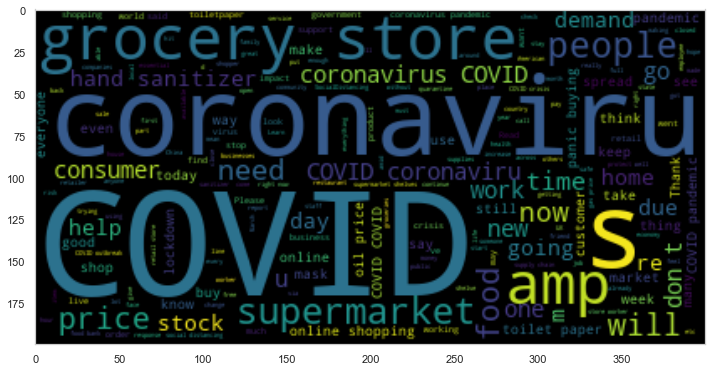

In [88]:
from wordcloud import WordCloud


cloud = WordCloud().generate(words)


plt.figure(figsize = (12, 12))
plt.imshow(cloud, interpolation = 'bilinear');
plt.grid(False);
# plt.axis('off');

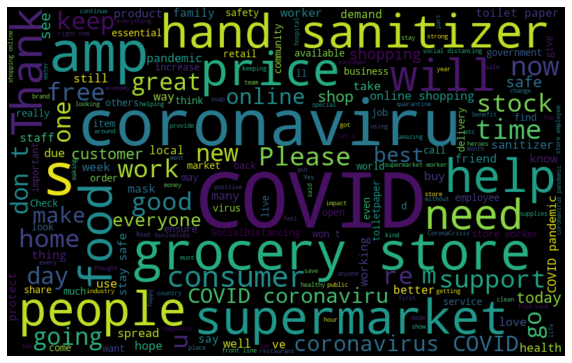

In [89]:
# create text from just extremely positive  tweets
normal_words = ' '.join([text for text in df1['Tweet'][df1['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

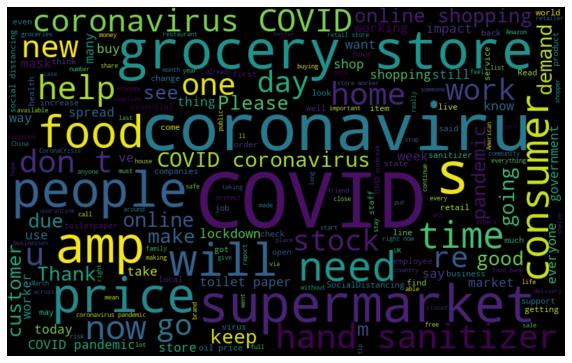

In [90]:
# create text from just positive tweets
normal_words = ' '.join([text for text in df1['Tweet'][df1['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

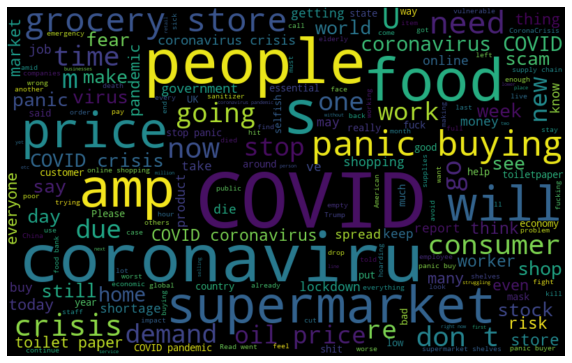

In [91]:
# create text from just Extremely Negative tweets
normal_words = ' '.join([text for text in df1['Tweet'][df1['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

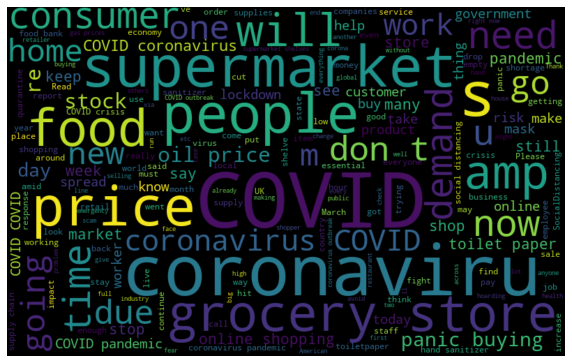

In [92]:
# create text from just Negative tweets
normal_words = ' '.join([text for text in df1['Tweet'][df1['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

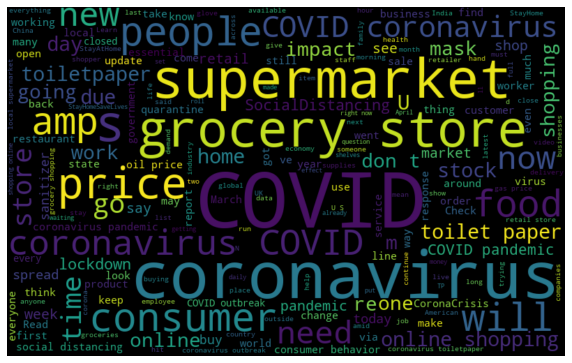

In [93]:
# create text from just Neutral tweets
normal_words = ' '.join([text for text in df1['Tweet'][df1['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Getting features from tweets

In [94]:
new_df = df1[['Tweet','Sentiment']]

In [95]:
new_df

,Tweet,Sentiment
0,eNyrbie hil Gahan hrisitv,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know it s getting tough when ameronWilds i...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


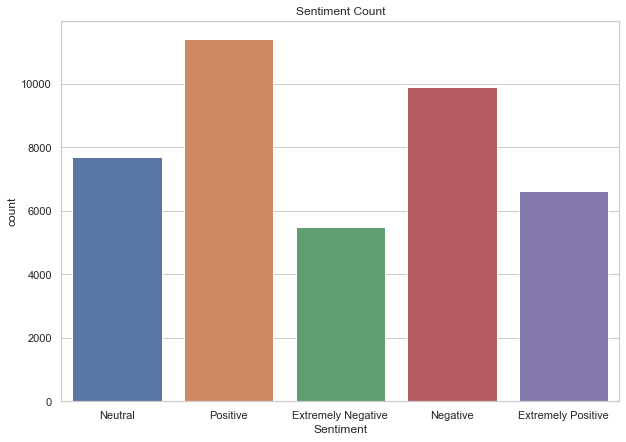

In [96]:
plt.figure(figsize = (10, 7));
sns.countplot(new_df['Sentiment']);
plt.title('Sentiment Count');

# Removing Stopwords

In [97]:
import nltk

In [98]:
from nltk.corpus import stopwords

In [99]:
stop_words = stopwords.words('english')

In [100]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [127]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

KeyboardInterrupt: 

In [128]:
new_df.drop(['tweet'], axis = 1, inplace = True)

In [129]:
new_df.head()

,Tweet,Sentiment
0,eNyrbie hil Gahan hrisitv,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative


In [130]:
new_df.head(5)

,Tweet,Sentiment
0,eNyrbie hil Gahan hrisitv,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative


# Splitting the dataset into training and testing

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
train, validation = train_test_split(new_df, test_size=0.2,
                                    stratify=new_df.Sentiment.values,
                                    random_state=0)

In [134]:
train.shape, validation.shape

((32925, 2), (8232, 2))

# Uing count vectorizer for Multi-Class Classification

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop_words)

In [146]:
X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(validation.Tweet.values)

y_train = train.Sentiment.values
y_valid = validation.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 43935)
X_train.shape :  (8232, 43935)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# Naive Bayes Classification for Multi-Class Classification

In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [152]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.7481548974943052
Validation accuracy Score :  0.46938775510204084
                    precision    recall  f1-score   support

Extremely Negative       0.34      0.59      0.43       637
Extremely Positive       0.38      0.59      0.46       850
          Negative       0.52      0.43      0.47      2407
           Neutral       0.30      0.69      0.42       665
          Positive       0.65      0.41      0.50      3673

          accuracy                           0.47      8232
         macro avg       0.44      0.54      0.46      8232
      weighted avg       0.53      0.47      0.48      8232



In [155]:
y_pred = naiveByes_clf.predict(X_valid)

In [156]:
cm1 = confusion_matrix(y_valid, y_pred)
cm1

array([[ 373,   12,  550,   21,  140],
       [  12,  505,   71,   20,  717],
       [ 196,   45, 1038,   66,  638],
       [  19,   52,  322,  460,  690],
       [  37,  236,  426,   98, 1488]], dtype=int64)

<AxesSubplot:>

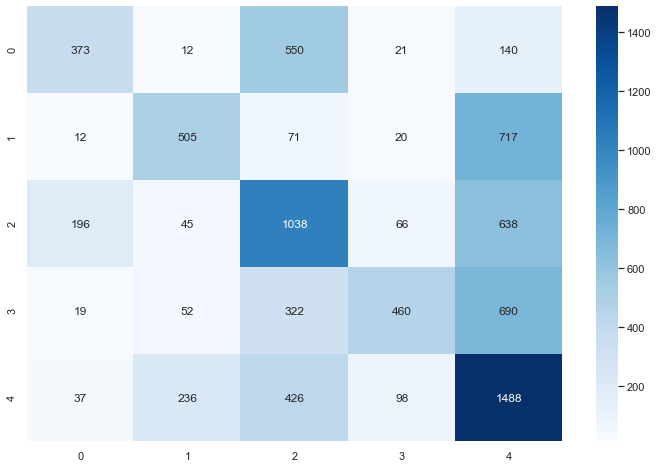

In [164]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm1, cmap= 'Blues', annot=True, fmt='g')

# Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rf_clf = RandomForestClassifier()

In [174]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [175]:
rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9964160971905847
Validation accuracy Score :  0.5618318756073858
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.69      0.49       590
Extremely Positive       0.33      0.74      0.46       595
          Negative       0.52      0.52      0.52      2002
           Neutral       0.82      0.59      0.69      2129
          Positive       0.65      0.51      0.57      2916

          accuracy                           0.56      8232
         macro avg       0.54      0.61      0.54      8232
      weighted avg       0.62      0.56      0.57      8232



<AxesSubplot:>

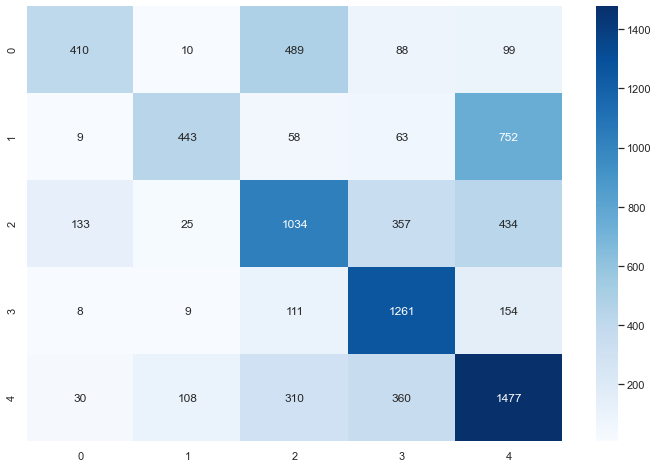

In [178]:
cm2 = confusion_matrix(y_valid,rf_prediction)

plt.figure(figsize=(12, 8))
sns.heatmap(cm2, cmap= 'Blues', annot=True, fmt='g')

# Extreme Gradient Boosting ( For Multiclass Classification)

In [176]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[21:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.684707668944571
Validation accuracy Score :  0.5851554907677357
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.64      0.55       823
Extremely Positive       0.55      0.72      0.62      1010
          Negative       0.46      0.56      0.51      1620
           Neutral       0.85      0.53      0.66      2450
          Positive       0.59      0.57      0.58      2329

          accuracy                           0.59      8232
         macro avg       0.59      0.61      0.58      8232
      weighted avg       0.62      0.59      0.59      8232



<AxesSubplot:>

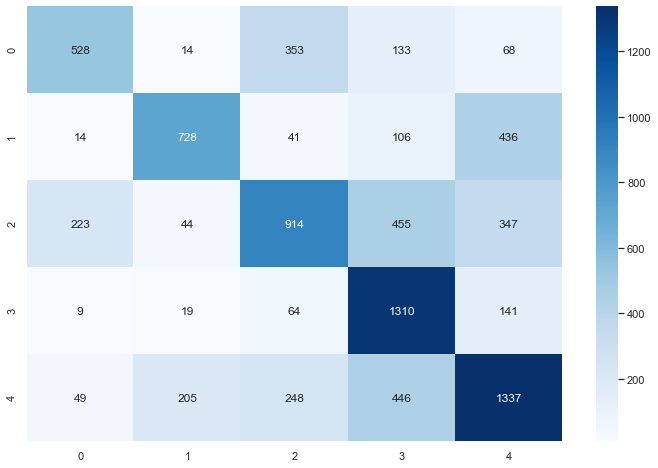

In [179]:
cm2 = confusion_matrix(y_valid,xgb_prediction)

plt.figure(figsize=(12, 8))
sns.heatmap(cm2, cmap= 'Blues', annot=True, fmt='g')

# Logistic Regression(For Multiclass Classification)

In [180]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9508580106302202
Validation accuracy Score :  0.6160106899902819
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.67      0.64       991
Extremely Positive       0.60      0.69      0.64      1156
          Negative       0.56      0.56      0.56      1957
           Neutral       0.73      0.65      0.68      1742
          Positive       0.60      0.58      0.59      2386

          accuracy                           0.62      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.62      0.62      8232



<AxesSubplot:>

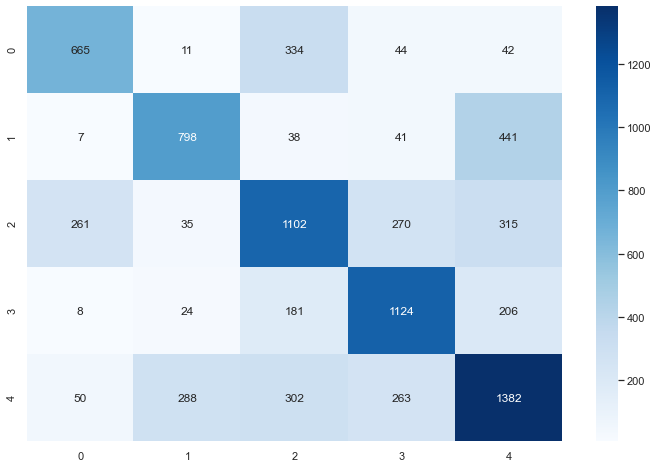

In [181]:
cm2 = confusion_matrix(y_valid,logreg_prediction)

plt.figure(figsize=(12, 8))
sns.heatmap(cm2, cmap= 'Blues', annot=True, fmt='g')

# All the multiclass models test accuracy in descending order

In [182]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'XGBoost'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
               xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Logistic Regression,0.616011
3,XGBoost,0.585155
1,Random Forest,0.561832
2,Naive Bayes,0.469388


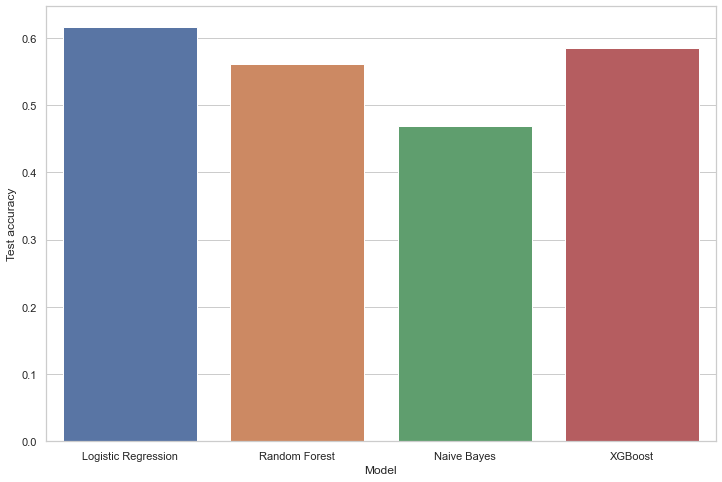

In [186]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Model', y = 'Test accuracy', data = models);


# CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION

In [187]:
new_df.head()

,Tweet,Sentiment
0,eNyrbie hil Gahan hrisitv,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative


In [188]:
binary = new_df[['Tweet','Sentiment']]

In [189]:
binary.head()

,Tweet,Sentiment
0,eNyrbie hil Gahan hrisitv,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative


In [190]:
binary["Sentiment"]= binary["Sentiment"].replace('Positive',1) 
binary["Sentiment"]= binary["Sentiment"].replace('Extremely Positive',1) 
binary["Sentiment"]= binary["Sentiment"].replace('Neutral',1) 
binary["Sentiment"]= binary["Sentiment"].replace('Negative',0) 
binary["Sentiment"]= binary["Sentiment"].replace('Extremely Negative',0) 


In [191]:
binary.head()

,Tweet,Sentiment
0,eNyrbie hil Gahan hrisitv,1
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia Woolworths to give elder...,1
3,My food stock is not the only one which is emp...,1
4,Me ready to go at supermarket during the COVID...,0


In [192]:
binary.Sentiment.value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [193]:
# assigning to x and y variables
X = binary.drop('Sentiment', axis=1)
y = binary.Sentiment

In [195]:
binary['Tweet'].apply(lambda x: [item for item in x if item not in stop_words])

0        [e, N, r, b, e,  , h, l,  , G, h, n,  , h, r, ...
1        [v, c, e,  , T, l, k,  ,  , u, r,  , n, e, g, ...
2        [C, r, n, v, r, u,  , A, u, r, l,  , W, l, w, ...
3        [M,  , f,  , c, k,  ,  , n,  , h, e,  , n, l, ...
4        [M, e,  , r, e,  ,  , g,  ,  , u, p, e, r, r, ...
                               ...                        
41152    [A, r, l, n, e,  , p, l,  , f, f, e, r, n, g, ...
41153    [R, e, p, n, e,  ,  , c, p, l, n,  , n,  , p, ...
41154    [Y, u,  , k, n, w,  ,  ,  , g, e, n, g,  , u, ...
41155    [I,  ,  , w, r, n, g,  , h,  , h, e,  , e, l, ...
41156    [r, C,  , W, e, l, l,  , n, e, w,  , u, e,  , ...
Name: Tweet, Length: 41157, dtype: object

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [196]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(binary,test_size = 0.2,
                               random_state=0,stratify = binary.Sentiment.values) 
#stratification means that the train_test_split method returns training and test subsets that have the same proportions
# of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# USING COUNT VECTORIZER

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop_words)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 44080)
X_train.shape :  (8232, 44080)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION

In [199]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8847987851176917
Validation accuracy Score :  0.793488824101069
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2822
           1       0.86      0.82      0.84      5410

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.79      0.80      8232



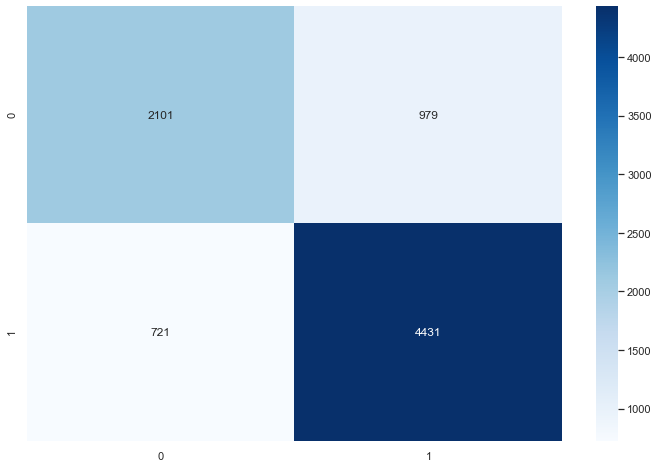

In [205]:
cm5 = confusion_matrix(y_valid, NB_prediction)
plt.figure(figsize=(12, 8))
sns.heatmap(cm5, annot = True, cmap = 'Blues', fmt = 'g');
# sns.heatmap(cm2, cmap= 'Blues', annot=True, fmt='g')

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [206]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9987547456340167
Validation accuracy Score :  0.8329689018464529
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      2653
           1       0.91      0.84      0.87      5579

    accuracy                           0.83      8232
   macro avg       0.81      0.83      0.82      8232
weighted avg       0.84      0.83      0.84      8232



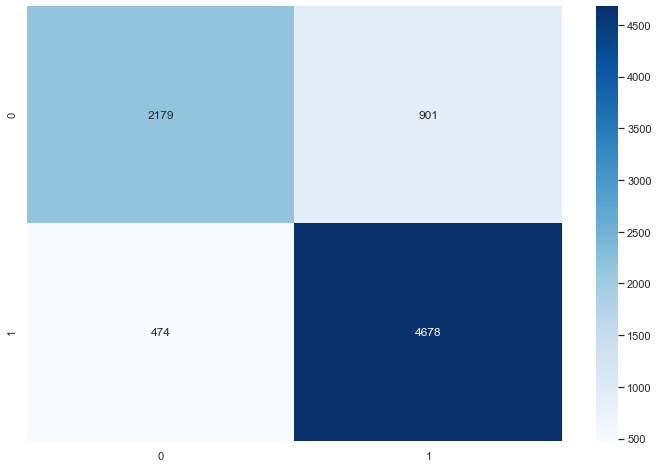

In [210]:
cm6 = confusion_matrix(y_valid, rf_prediction)

plt.figure(figsize=(12, 8))
sns.heatmap(cm6, annot = True, cmap = 'Blues', fmt = 'g');

# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [211]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9650113895216401
Validation accuracy Score :  0.863581146744412
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2765
           1       0.92      0.87      0.89      5467

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.87      8232



In [215]:
from sklearn.metrics import roc_auc_score

In [216]:
roc_auc_score(y_valid, logreg_prediction)

0.8440711462450593

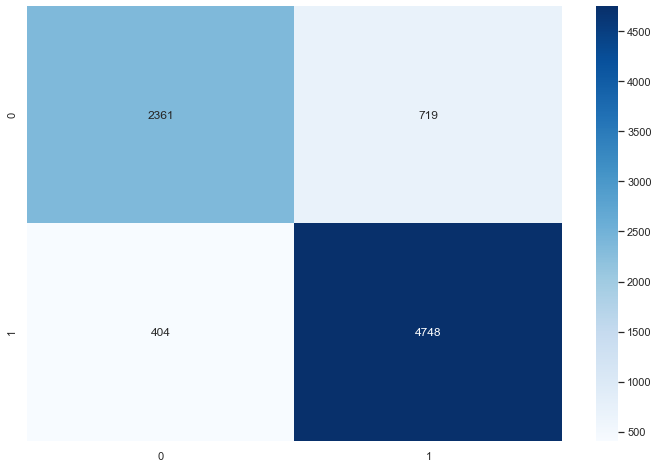

In [212]:
cm7 = confusion_matrix(y_valid, logreg_prediction)

plt.figure(figsize=(12, 8))
sns.heatmap(cm7, annot = True, cmap = 'Blues', fmt = 'g');

# XG BOOST( BINARY CLASSIFICATION)

In [213]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[23:58:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.8437965072133637
Validation accuracy Score :  0.8169339164237124
              precision    recall  f1-score   support

           0       0.62      0.85      0.72      2277
           1       0.93      0.81      0.86      5955

    accuracy                           0.82      8232
   macro avg       0.78      0.83      0.79      8232
weighted avg       0.85      0.82      0.82      8232



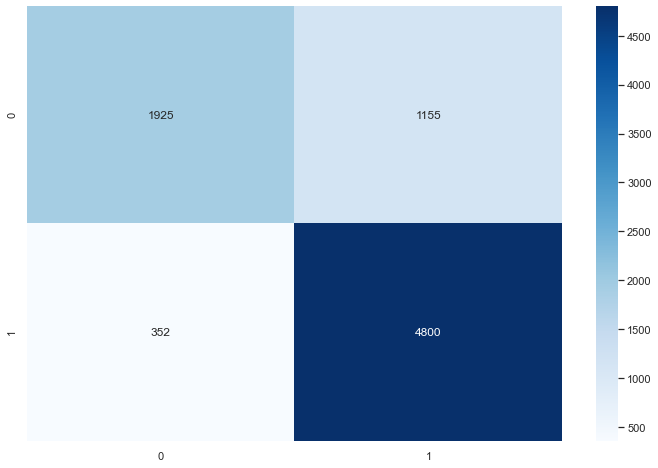

In [214]:
cm8 = confusion_matrix(y_valid, xgb_prediction)

plt.figure(figsize=(12, 8))
sns.heatmap(cm8, annot = True, cmap = 'Blues', fmt = 'g');

# Winner Model:

In [218]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
               'XGBoost'],
    'Test accuracy': [logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
               xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Logistic Regression,0.863581
1,Random Forest,0.832969
3,XGBoost,0.816934
2,Naive Bayes,0.793489


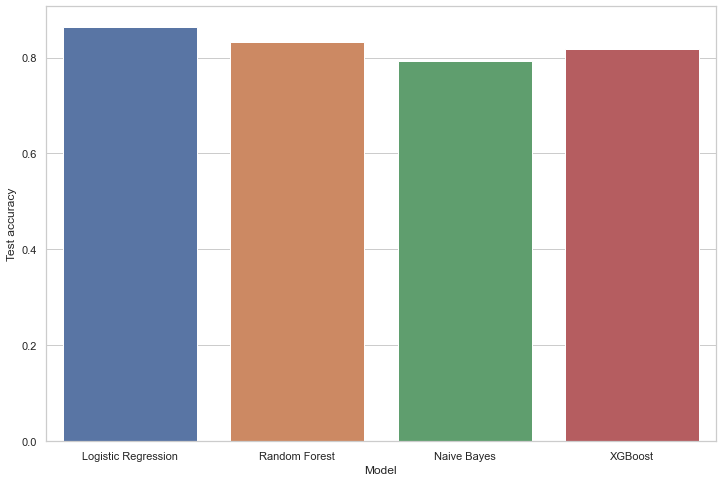

In [222]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Model', y = 'Test accuracy', data = models);

# Conclusions:
* Logistic Regression model in binary regression classification performs better than other models.
* Logistic Regression model in multi-class classification performs better than all the other models.
* In both the cases, Logistic Regression turns out to be the better model.

# THANKS YOU. WHAT'S YOUR SENTIMENT FOR THIS PROJECT? FEELING HAPPY OR NOT??